In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

## Implementing Bagging from stratch

In [9]:


# Load dataset
X, y = load_iris(return_X_y=True)

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Parameters
n_estimators = 10
n_samples = int(0.8 * len(X_train))
models = []

# Train multiple models on different bootstrap samples
for i in range(n_estimators):
    X_sample, y_sample = resample(X_train, y_train, n_samples=n_samples, replace=True, random_state=i)
    model = DecisionTreeClassifier()
    model.fit(X_sample, y_sample)
    models.append(model)

# Make predictions (majority voting)
from scipy.stats import mode

predictions = np.array([model.predict(X_test) for model in models])
final_prediction, _ = mode(predictions, axis=0)

print("Bagging Accuracy:\n", classification_report(y_test, final_prediction.ravel()))


Bagging Accuracy:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



The results above clearly demonstrate that bagging significantly reduces test error and enhances model performance. By aggregating predictions from multiple base estimators trained on different bootstrap samples, bagging increases the robustness and generalization ability of the model, leading to improved accuracy and more reliable predictions on unseen data.

## Baging and Pasting

In [51]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1500, noise=0.3, random_state=42)

X_train , X_test , y_train, y_test = train_test_split(X_moons, y_moons
                                                      , test_size=0.2, random_state=10)


In [31]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True, 
    n_jobs=-1
)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       148
           1       0.93      0.91      0.92       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



##  Out-of-Bag Evaluation

With bagging, some instances may be sampled several times for any given predictor,
 while others may not be sampled at all. By default a BaggingClassifier samples m
 training instances with replacement (bootstrap=True), where m is the size of the
 training set. This means that only about 63% of the training instances are sampled on
 average for each predictor.6 The remaining 37% of the training instances that are not
 sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
 for all predictors.

In [25]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True, 
    n_jobs=-1,
    oob_score=True,
    bootstrap_features=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.8841666666666667

 According to this oob evaluation, this BaggingClassifier is likely to achieve about
 89.08% accuracy on the test set. Let's verify this.

In [26]:
print(classification_report(y_test, bag_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       148
           1       0.93      0.89      0.91       152

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



91% Accuracy that's close enought.

## Random Patches and Random Subpatches

 - Random Patches: sampling both training instance and features
 - Random Subpatches: Keeping all training instances (i.e., bootstrap=False and max_sam
    ples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_fea
    tures smaller than 1.0) is called the Random Subspaces method.8

In [35]:
# Random Patches
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True, 
    n_jobs=-1,
    oob_score=True,
    bootstrap_features=True
)
bag_clf.fit(X_train, y_train)


print(classification_report(y_test, bag_clf.predict(X_test)))



              precision    recall  f1-score   support

           0       0.89      0.92      0.91       148
           1       0.92      0.89      0.91       152

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [40]:
# Random subpatches

bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=False,
    n_jobs=-1,
    bootstrap_features=True
)
bag_clf.fit(X_train, y_train)


print(classification_report(y_test, bag_clf.predict(X_test)))



              precision    recall  f1-score   support

           0       0.87      0.89      0.88       148
           1       0.89      0.88      0.88       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



### Conclusion 
 : It's obvious that random patches imporves the model performance better than random subpatches

In [49]:
# Random Forest Classifier: an essemble extension  of decision tree 4
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, # NORMALL EQUALS TO TRAIN SIZE
                                 max_leaf_nodes=16,
                                 n_jobs=-1, 
                                 max_samples=1.0                              
                                 )
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print(classification_report(y_test, y_pred_rf, zero_division=True))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       148
           1       0.96      0.91      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



-  The BaggingClassifier class remains useful if you want a bag of something other than Decision Trees.
- There are a few notable exceptions: splitter is absent (forced to "random"), presort is absent (forced to
 False), max_samples is absent (forced to 1.0), and base_estimator is absent (forced to DecisionTreeClassi
 fier with the provided hyperparameters).

> **Note:**  
> It is difficult to predict in advance whether a `RandomForestClassifier` will outperform an `ExtraTreesClassifier`.  
> 
> The best practice is to try both algorithms and compare their performance using cross-validation, while tuning their hyperparameters (e.g., via grid search).


## Random Forest for Feature Selection

Random Forests are powerful tools not only for classification and regression tasks but also for identifying the most important features in your dataset. By evaluating feature importances, Random Forests provide valuable insights into which features contribute most to the predictive performance of the model.

<div style="background: black; border-left: 4px solid #007acc; padding: 1em; margin: 1em 0; border-radius: 4px;">
<strong>Key Benefits:</strong>
<ul>
    <li><strong>Automatic Feature Ranking:</strong> Random Forests assign an importance score to each feature, helping you focus on the most relevant variables.</li>
    <li><strong>Dimensionality Reduction:</strong> By selecting only the top features, you can simplify your models and potentially improve generalization.</li>
    <li><strong>Interpretability:</strong> Feature importances provide transparency into model decisions, supporting explainable AI initiatives.</li>
</ul>
</div>

> 💡 <strong>Tip:</strong> Use the <code>feature_importances_</code> attribute of a trained <code>RandomForestClassifier</code> to access and visualize feature importances for your dataset.

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):

    print(name, score)

sepal length (cm) 0.0933684479691592
sepal width (cm) 0.023038342946713693
petal length (cm) 0.43033229650352717
petal width (cm) 0.45326091258059986


**It seems that the most important features are:**

- **Petal length:** 44%
- **Petal width:** 42%
- **Sepal length:** 11%
- **Sepal width:** 2%

<span style="color:#007acc"><strong>Conclusion:</strong></span>  
Petal length and width are by far the most important features for classification in the Iris dataset, while sepal length and width contribute much less.

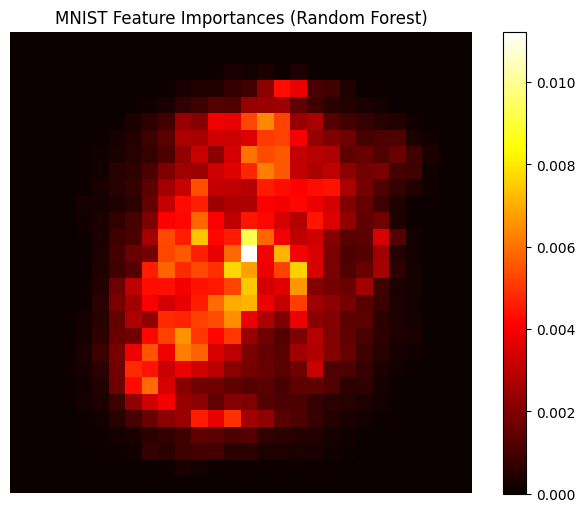

In [50]:
from sklearn.datasets import fetch_openml
import numpy as np

import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist, y_mnist = mnist["data"], mnist["target"]

# Train a RandomForestClassifier on a subset for speed
rf_mnist = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_mnist.fit(X_mnist[:10000], y_mnist[:10000])

# Get feature importances and reshape to 28x28
importances = rf_mnist.feature_importances_.reshape(28, 28)

plt.figure(figsize=(8, 6))
plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.title("MNIST Feature Importances (Random Forest)")
plt.colorbar()
plt.axis('off')
plt.show()

Random Forests are very handy to get a quick understanding of what features
 actually matter, in particular if you need to perform feature selection.

In [1]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")  # For cleaner output

# Step 1: Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=42, class_sep=1.5
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Define individual base models
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()

# Step 3: Create a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('knn', clf2),
        ('dt', clf3)
    ],
    voting='hard'  # Use 'soft' if all classifiers support predict_proba
)

# Step 4: Use BaggingClassifier on the VotingClassifier
bagged_voting = BaggingClassifier(
    base_estimator=voting_clf,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

# Step 5: Train and evaluate
bagged_voting.fit(X_train, y_train)
y_pred = bagged_voting.predict(X_test)

print("Accuracy (Bagged Voting Classifier):", accuracy_score(y_test, y_pred))


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'